## poisson intervals distribution

mean:9934
max:126708
[np.float64(8255.0), np.float64(5849.0), np.float64(3710.0), np.float64(40570.0), np.float64(2040.0), np.float64(4739.0), np.float64(4807.0), np.float64(6842.0), np.float64(8222.0), np.float64(4020.0), np.float64(429.0), np.float64(13607.0), np.float64(34187.0), np.float64(4904.0), np.float64(195.0), np.float64(13858.0), np.float64(4104.0), np.float64(42019.0), np.float64(6771.0), np.float64(482.0), np.float64(6294.0), np.float64(53011.0), np.float64(434.0), np.float64(8366.0), np.float64(206.0), np.float64(4699.0), np.float64(116.0), np.float64(3701.0), np.float64(3223.0), np.float64(19249.0), np.float64(16487.0), np.float64(9504.0), np.float64(27083.0), np.float64(1405.0), np.float64(56852.0), np.float64(404.0), np.float64(2877.0), np.float64(19680.0), np.float64(685.0), np.float64(1718.0), np.float64(15282.0), np.float64(1003.0), np.float64(6168.0), np.float64(2416.0), np.float64(2115.0), np.float64(11139.0), np.float64(12934.0), np.float64(43153.0), np.float64(

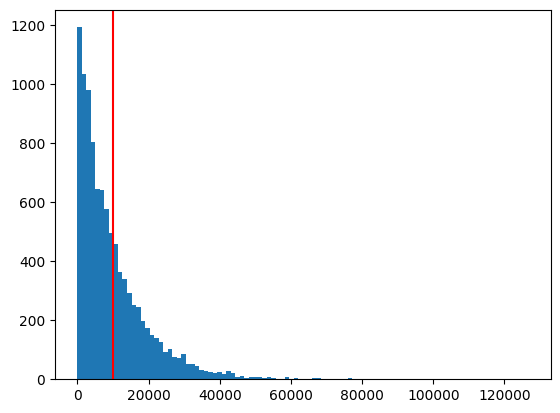

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stepsLenght = []
for i in range(10000):
    roll= np.ceil(np.random.exponential(10000))
    stepsLenght.append(roll)
    # print(roll)

stepsPos = [0] * len(stepsLenght)
        
for i in range(len(stepsLenght)):
    if(i == 0):
        stepsPos[0] = 100
    else:
        stepsPos[i] = stepsPos[i-1] + stepsLenght[i]

plt.hist(stepsLenght,100)
plt.axvline(np.mean(stepsLenght), color='red')
print("mean:" + str(int(np.mean(stepsLenght))) +"\nmax:" + str(int(np.max(stepsLenght))))
print(stepsLenght)
print(stepsPos)

#sns.distplot(np.random.exponential(size=1000000), hist=True)


# test #1

### pos vs time

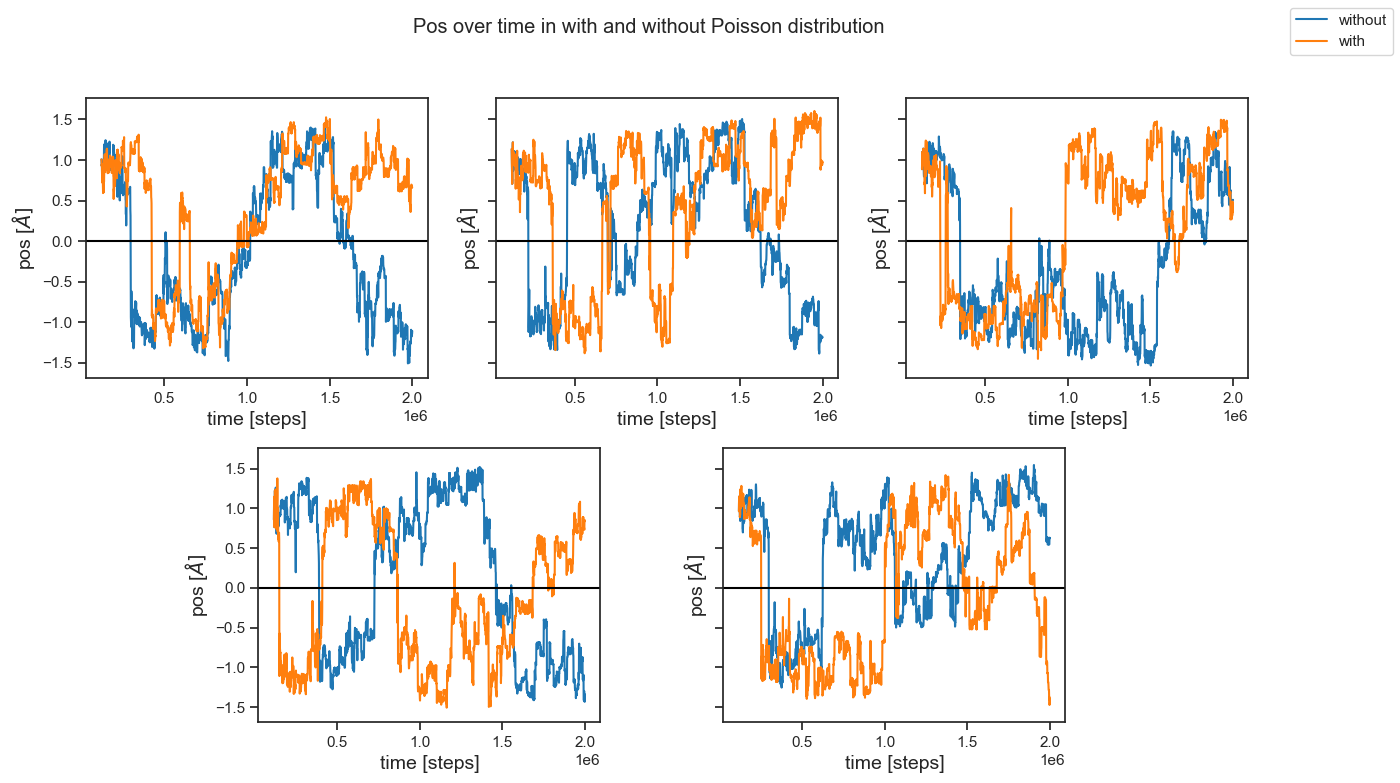

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=False, sharey=True)
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.1,0.228,0.343])
axes[1][1].set_position([0.55,0.1,0.228,0.343])

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_low" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    # plt.plot(time, posX, label= seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "without")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[1,0].plot(time, posX)
        case 4:
            axes[1,1].plot(time, posX)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowWithDist" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    # plt.plot(time, posX, label= seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label="with")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[1,0].plot(time, posX)
        case 4:
            axes[1,1].plot(time, posX)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])
            
fig.suptitle("Pos over time in with and without Poisson distribution")
for ax in axes.flat:
    ax.set(xlabel="time [steps]", ylabel=r"pos [$\AA ]$")
    ax.axhline(0, color = 'black')

fig.legend()


## original free energy surface

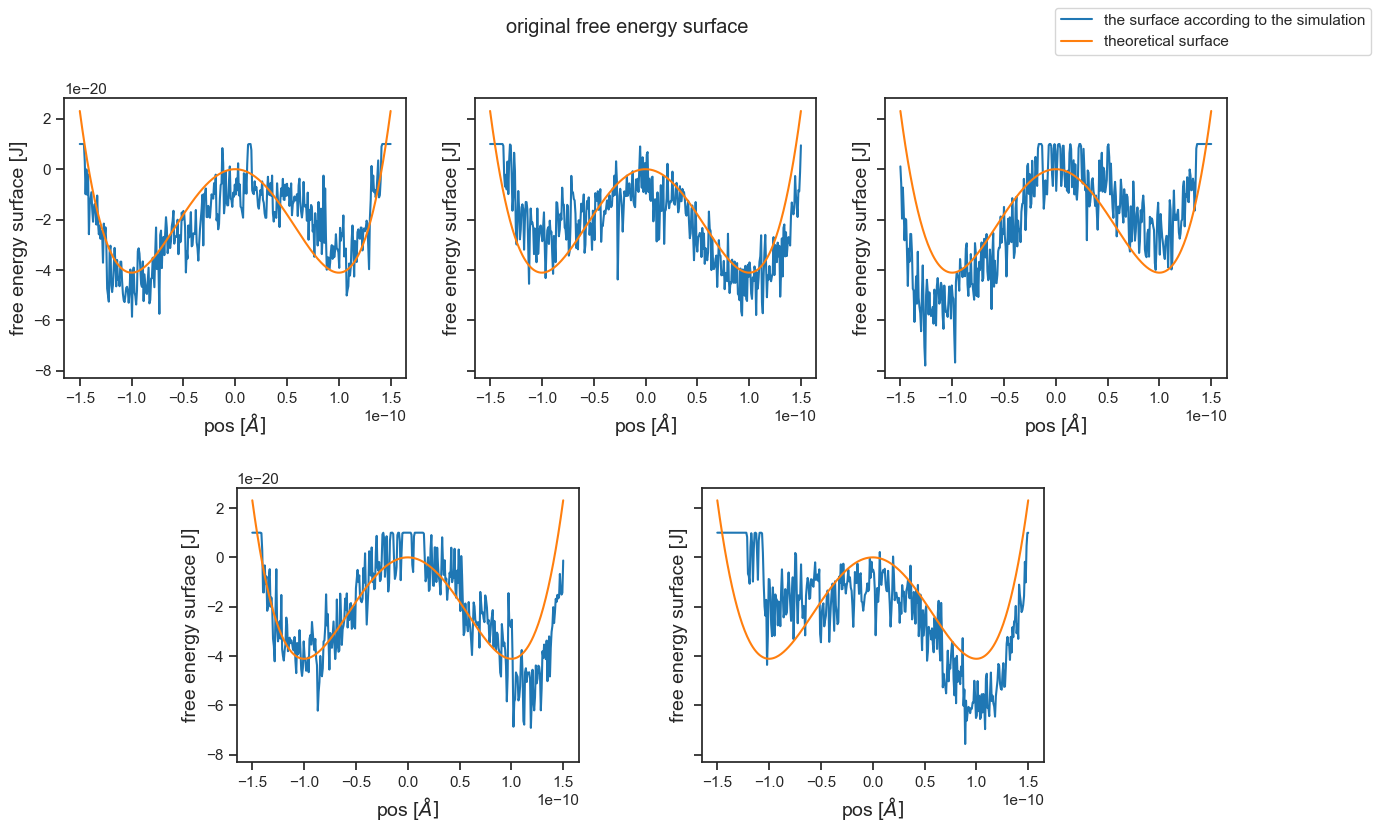

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=False, sharey=True)
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.05,0.228,0.343])
axes[1][1].set_position([0.55,0.05,0.228,0.343])

x = np.linspace(-1.5E-10, 1.5E-10, 376)
w = 2E-20
sigma = 0.5E-12
y = []
A = 4.11E20
B = 8.22
for i in x:
    y.append(A*i**4-B*i**2)

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]): 
    df = pd.read_csv("gaussiansPos_1st_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0) +0.1E-19)
    match i:
        case 0:
            axes[0][0].plot(x, arr, label="the surface according to the simulation")
            axes[0][0].plot(x, y, label="theoretical surface")
        case 1:
            axes[0][1].plot(x, arr)
            axes[0][1].plot(x, y)
        case 2:
            axes[0][2].plot(x, arr)
            axes[0][2].plot(x, y)
        case 3:
            axes[1][0].plot(x, arr)
            axes[1][0].plot(x, y)
        case 4:
            axes[1][1].plot(x, arr)   
            axes[1][1].plot(x, y)


fig.suptitle("original free energy surface")
for ax in axes.flat:
    ax.set(xlabel=r"pos [$\AA ]$", ylabel="free energy surface [J]")
fig.legend()


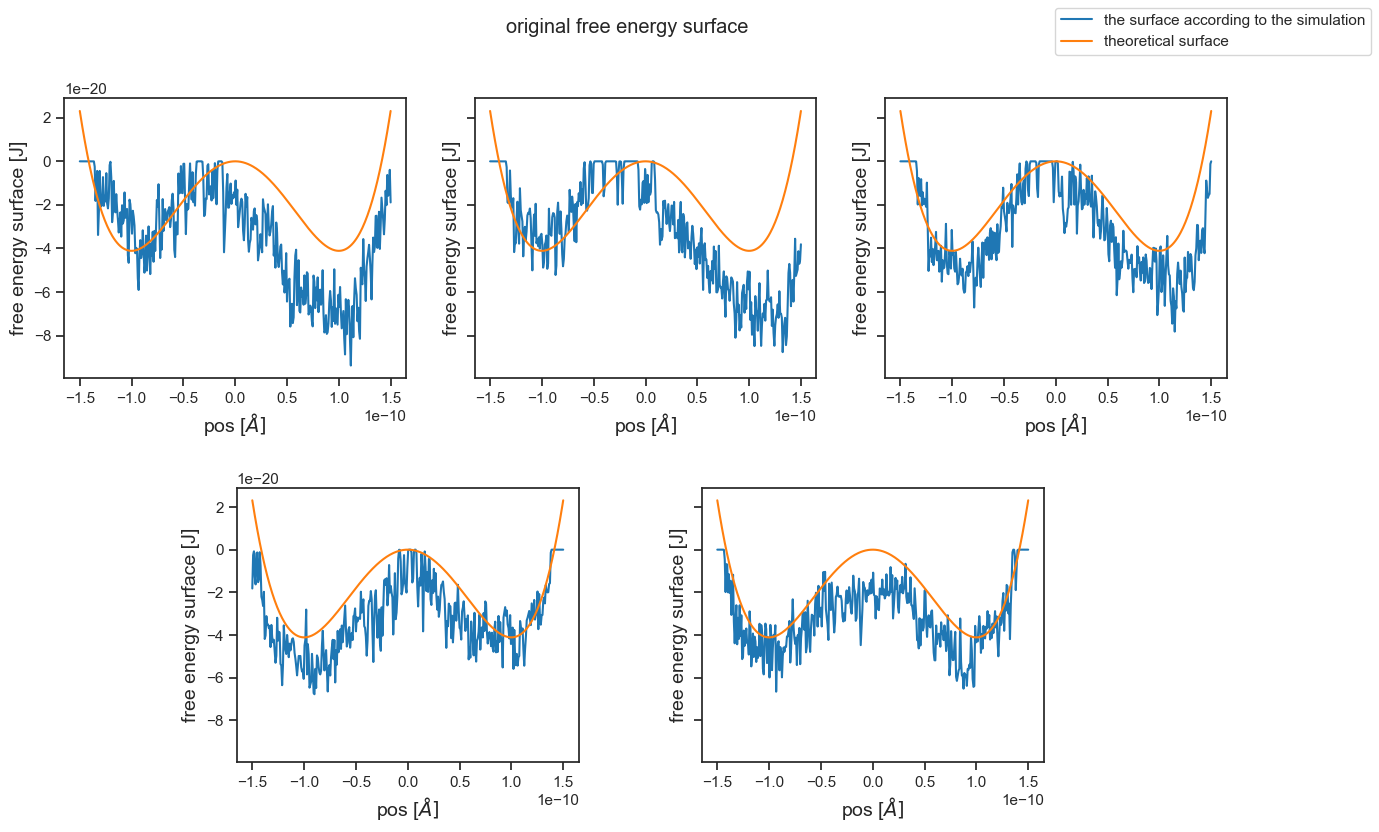

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=False, sharey=True)
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.05,0.228,0.343])
axes[1][1].set_position([0.55,0.05,0.228,0.343])

x = np.linspace(-1.5E-10, 1.5E-10, 376)
w = 2E-20
sigma = 0.5E-12
y = []
A = 4.11E20
B = 8.22
for i in x:
    y.append(A*i**4-B*i**2)

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]): 
    df = pd.read_csv("gaussiansPos_2nd_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0))
    match i:
        case 0:
            axes[0][0].plot(x, arr, label="the surface according to the simulation")
            axes[0][0].plot(x, y, label="theoretical surface")
        case 1:
            axes[0][1].plot(x, arr)
            axes[0][1].plot(x, y)
        case 2:
            axes[0][2].plot(x, arr)
            axes[0][2].plot(x, y)
        case 3:
            axes[1][0].plot(x, arr)
            axes[1][0].plot(x, y)
        case 4:
            axes[1][1].plot(x, arr)   
            axes[1][1].plot(x, y)

fig.suptitle("original free energy surface")
for ax in axes.flat:
    ax.set(xlabel=r"pos [$\AA ]$", ylabel="free energy surface [J]")
fig.legend()

# test 2 (DEEP)

### pos vs time

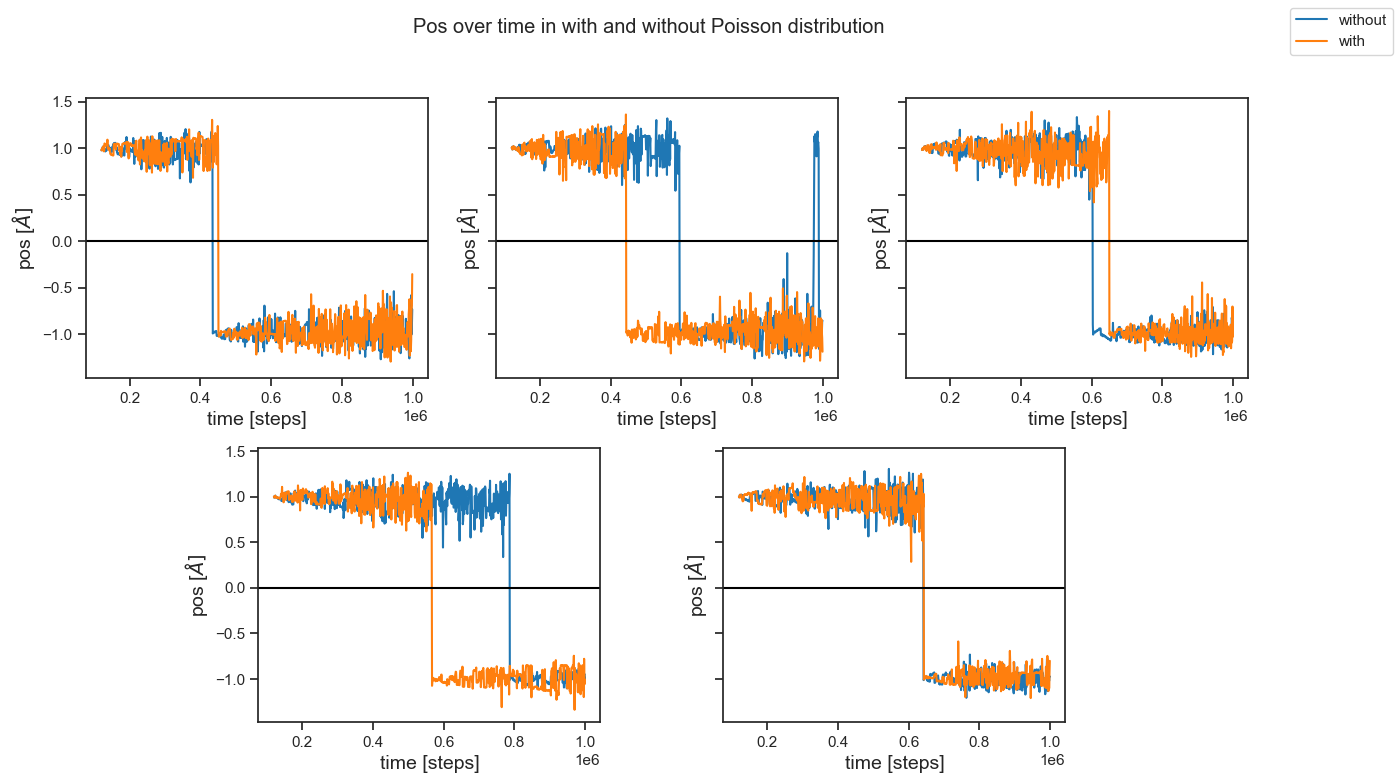

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=False, sharey=True)
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.1,0.228,0.343])
axes[1][1].set_position([0.55,0.1,0.228,0.343])

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    #plt.plot(time, posX, label=seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "without")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[1,0].plot(time, posX)
        case 4:
            axes[1,1].plot(time, posX)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])
            
for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowWithDistDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "with")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[1,0].plot(time, posX)
        case 4:
            axes[1,1].plot(time, posX)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

fig.suptitle("Pos over time in with and without Poisson distribution")
for ax in axes.flat:
    ax.set(xlabel="time [steps]", ylabel=r"pos [$\AA ]$")
    ax.axhline(0, color = 'black')
    
fig.legend()